In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [55]:
uk_pv = pd.read_csv('../../../Data/system_metadata_location_rounded.csv')
uk_pv['ss_id_string'] = uk_pv['ss_id'].astype('str')
#data_multiple.plot(legend=False)
lats = dict(uk_pv.set_index('ss_id')['latitude_noisy'])
longs = dict(uk_pv.set_index('ss_id')['longitude_noisy'])

data =  pd.read_csv('../../../Data/pv_power_df_5day_capacity_scaled.csv', index_col='datetime')

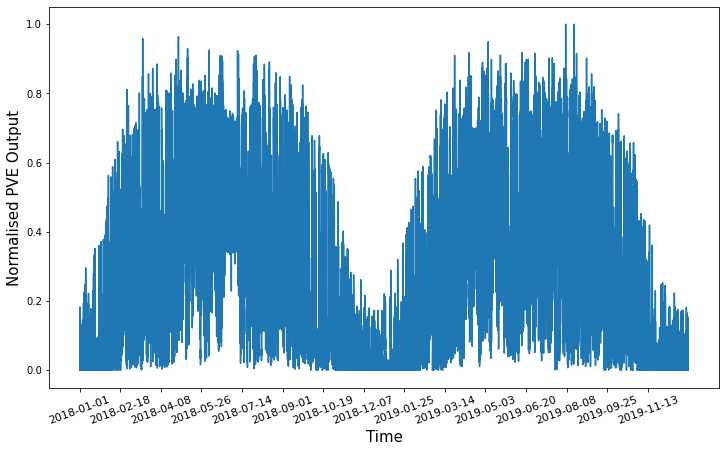

In [59]:
#FOR THE DAILY PLOT, IN BOUNDED_GP NOTEBOOK:
len_samples = len(data.iloc[:,1])
days_index = max(97, int(((len_samples / 15) // 97) * 97)) #number of time intervals to match 5 beginnings of days
plt.figure(figsize=(12,7))
plt.plot(np.arange(len(data.iloc[:,10])), data.iloc[:,10])
plt.xlabel('Time', fontsize=15)
plt.ylabel('Normalised PVE Output', fontsize=15)
plt.xticks(ticks = np.arange(len(data.iloc[:,1]))[-len_samples:-1:days_index], labels = [s[:10] for s in data.iloc[:,0].index[-len_samples:-1:days_index].values], size=11, rotation = 20);
plt.savefig(f'../figures/yearly_ts_plot.png', dpi=300, bbox_inches='tight')
plt.show()


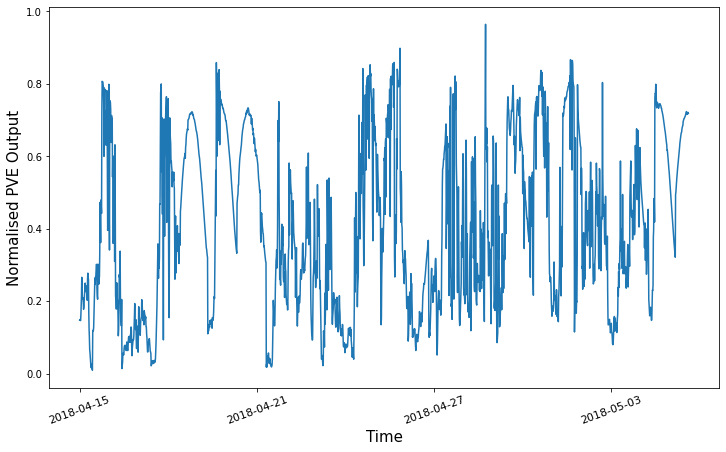

In [61]:
#FOR THE DAILY PLOT, IN BOUNDED_GP NOTEBOOK:
len_samples = 2000
days_index = max(97, int(((len_samples / 3) // 97) * 97)) #number of time intervals to match 5 beginnings of days
plt.figure(figsize=(12,7))
plt.plot(np.arange(len(data.iloc[10000:12000,0])), data.iloc[10000:12000,10])
plt.xlabel('Time', fontsize=15)
plt.ylabel('Normalised PVE Output', fontsize=15)
plt.xticks(ticks = np.arange(len(data.iloc[10000:12000,0]))[-len_samples:-1:days_index], labels = [s[:10] for s in data.iloc[10000:12000,0].index[-len_samples:-1:days_index].values], size=11, rotation = 20);
plt.savefig(f'../figures/daily_ts_plot.png', dpi=300, bbox_inches='tight')
plt.show()



<AxesSubplot:xlabel='datetime'>

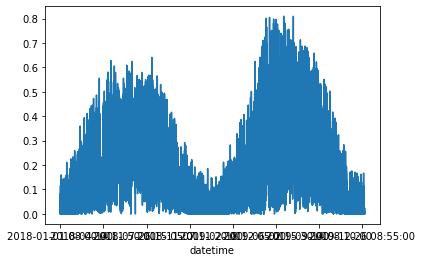

In [41]:
ts = data.iloc[:,0]
ts.plot()

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


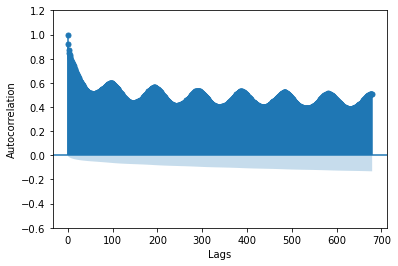

In [49]:
plot_acf(ts, lags = 97 * 7, title='', auto_ylims=True)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.ylim(-0.6,1.2)
plt.savefig(f'../figures/daily_acf_plot.png', dpi=300, bbox_inches='tight')
plt.show()

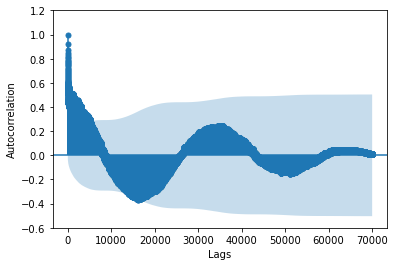

In [50]:
plot_acf(ts, lags = 70000, title='', auto_ylims=True)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.ylim(-0.6,1.2)
plt.savefig(f'../figures/yearly_acf_plot.png', dpi=300, bbox_inches='tight')
plt.show()

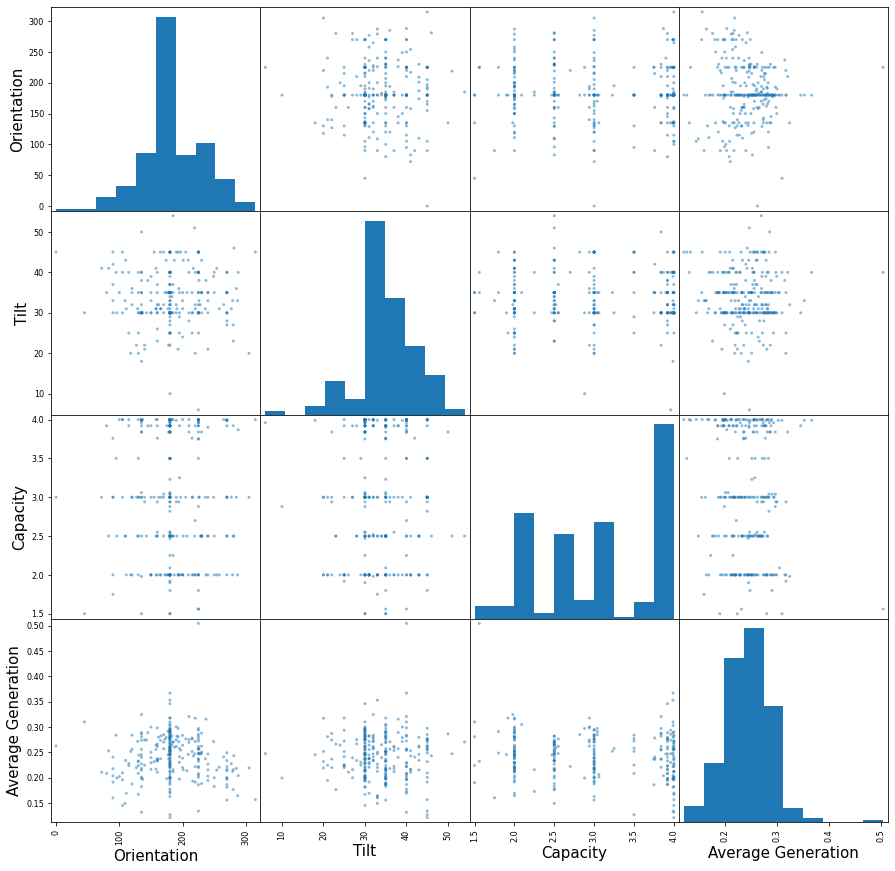

In [53]:
key_stats = uk_pv.set_index('ss_id_string')[['orientation', 'tilt', 'kwp']]
key_stats['avg_gen'] = data.mean()
key_stats = key_stats.dropna()
key_stats.columns = ['Orientation', 'Tilt', 'Capacity', 'Average Generation']

m = pd.plotting.scatter_matrix(key_stats, figsize=(15,15))
for ax in m.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 15)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15)
plt.savefig(f'../figures/scatter_matrix.png', dpi=300, bbox_inches='tight')
plt.show()